In [1]:
corpus = '''Hello Welcome, to Krish Naik's NLP tutorials. 
Please do watch the entire course! to become expert in NLP.
'''

In [2]:
print(corpus)

Hello Welcome, to Krish Naik's NLP tutorials. 
Please do watch the entire course! to become expert in NLP.



In [3]:
# tokenizati0on 
# sentences ---> paragraphs
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
sentences = sent_tokenize(corpus)

In [5]:
# Paragraph --> words
# Sentence -->words
from nltk.tokenize import word_tokenize


In [6]:
word_tokenize(corpus)

['Hello',
 'Welcome',
 ',',
 'to',
 'Krish',
 'Naik',
 "'s",
 'NLP',
 'tutorials',
 '.',
 'Please',
 'do',
 'watch',
 'the',
 'entire',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP',
 '.']

In [7]:
for sentence in sentences:
    print(word_tokenize(sentence))

['Hello', 'Welcome', ',', 'to', 'Krish', 'Naik', "'s", 'NLP', 'tutorials', '.']
['Please', 'do', 'watch', 'the', 'entire', 'course', '!']
['to', 'become', 'expert', 'in', 'NLP', '.']


In [8]:
# wordpunct tokenization
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(corpus)

['Hello',
 'Welcome',
 ',',
 'to',
 'Krish',
 'Naik',
 "'",
 's',
 'NLP',
 'tutorials',
 '.',
 'Please',
 'do',
 'watch',
 'the',
 'entire',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP',
 '.']

In [9]:
# when we want to tokenize the words and the fullstop get tokenize at the last only not at the previous fullstops
from nltk.tokenize import TreebankWordTokenizer

In [10]:
tokenizer = TreebankWordTokenizer()

In [11]:
tokenizer.tokenize(corpus)

['Hello',
 'Welcome',
 ',',
 'to',
 'Krish',
 'Naik',
 "'s",
 'NLP',
 'tutorials.',
 'Please',
 'do',
 'watch',
 'the',
 'entire',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP',
 '.']

# Stemming and its types-Text preprocessing 

In [12]:
words=["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]

## porter stemmer

In [13]:
from nltk.stem import PorterStemmer

In [14]:
stemming = PorterStemmer()

In [15]:
for word in words:
    print(word+"---->"+stemming.stem(word))

eating---->eat
eats---->eat
eaten---->eaten
writing---->write
writes---->write
programming---->program
programs---->program
history---->histori
finally---->final
finalized---->final


In [16]:
stemming.stem("congratulations") #  disadv. of stemming

'congratul'

# RegexpStemmer class
>> NLTK has RegexpStemmer class with the help of which we can easily implement Regular Expression Stemmer algorithms. It basically takes a single regular expression and removes any prefix or suffix that matches the expression. Let us see an example

In [17]:
from nltk.stem import RegexpStemmer


In [18]:
reg_stemmer = RegexpStemmer('ing$|s$|e$|able$', min= 4)

In [19]:
reg_stemmer.stem('eating')

'eat'

# Snowball stemmer

In [20]:
from nltk.stem import SnowballStemmer

In [21]:
stemmer = SnowballStemmer('english')

In [22]:
for word in words:
    print(word+"--->"+stemmer.stem(word))

eating--->eat
eats--->eat
eaten--->eaten
writing--->write
writes--->write
programming--->program
programs--->program
history--->histori
finally--->final
finalized--->final


In [23]:
stemming.stem("fairly"), stemming.stem("sportingly")

('fairli', 'sportingli')

In [24]:
stemmer.stem("fairly"), stemmer.stem("sportingly"),

('fair', 'sport')

# Lemmatizer

>> Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing.

>> NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find a lemma. Let us understand it with an example −

In [25]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
# :param pos: The Part Of Speech tag. Valid options are "n" for nouns,
#     "v" for verbs, "a" for adjectives, "r" for adverbs and "s" for satellite adjectives.
lemmatizer.lemmatize("going"), lemmatizer.lemmatize("going", pos='v')

('going', 'go')

In [28]:
for word in words:
    print(word+"--->"+lemmatizer.lemmatize(word, pos='v'))

eating--->eat
eats--->eat
eaten--->eat
writing--->write
writes--->write
programming--->program
programs--->program
history--->history
finally--->finally
finalized--->finalize


# Stop words

In [29]:
## Speech Of DR APJ Abdul Kalam
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [30]:
from nltk.stem import PorterStemmer

In [31]:
from nltk.corpus import stopwords

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
stemmer = WordNetLemmatizer()

In [35]:
sentences = nltk.sent_tokenize(paragraph)

In [36]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.',
 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s developme

In [37]:
for i in range(len(sentences)):
    sentences[i] = str.lower(sentences[i])
    words = (nltk.word_tokenize(sentences[i]))
    words = [stemmer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))] # take words only which is not in stopwords
    sentences[i] = ' '.join(words)

In [38]:
sentences

['three vision india .',
 '3000 year history , people world come invaded u , captured land , conquered mind .',
 'alexander onwards , greek , turk , mogul , portuguese , british , french , dutch , came looted u , took .',
 'yet done nation .',
 'conquered anyone .',
 'grabbed land , culture , history tried enforce way life .',
 '?',
 'respect freedom others.that first vision freedom .',
 'believe india got first vision 1857 , started war independence .',
 'freedom must protect nurture build .',
 'free , one respect u .',
 'second vision india ’ development .',
 'fifty year developing nation .',
 'time see developed nation .',
 'among top 5 nation world term gdp .',
 '10 percent growth rate area .',
 'poverty level falling .',
 'achievement globally recognised today .',
 'yet lack self-confidence see developed nation , self-reliant self-assured .',
 '’ incorrect ?',
 'third vision .',
 'india must stand world .',
 'believe unless india stand world , one respect u .',
 'strength respect 

# Part of speech tagging

>> Basically it tags the word according to their nouns, adjective, verbs etc.

In [39]:
import nltk
sentences = nltk.sent_tokenize(paragraph)

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
for i in range(len(sentences)):
    sentences[i] = str.lower(sentences[i])
    words = (nltk.word_tokenize(sentences[i]))
    words = [stemmer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))] # take words only which is not in stopwords
    pos_tag = nltk.pos_tag(words)
    print(pos_tag)

[('three', 'CD'), ('vision', 'NN'), ('india', 'NN'), ('.', '.')]
[('3000', 'CD'), ('year', 'NN'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('u', 'JJ'), (',', ','), ('captured', 'JJ'), ('land', 'NN'), (',', ','), ('conquered', 'VBD'), ('mind', 'NN'), ('.', '.')]
[('alexander', 'NN'), ('onwards', 'NNS'), (',', ','), ('greek', 'NN'), (',', ','), ('turk', 'NN'), (',', ','), ('mogul', 'NN'), (',', ','), ('portuguese', 'JJ'), (',', ','), ('british', 'JJ'), (',', ','), ('french', 'JJ'), (',', ','), ('dutch', 'VB'), (',', ','), ('came', 'VBD'), ('looted', 'VBN'), ('u', 'NN'), (',', ','), ('took', 'VBD'), ('.', '.')]
[('yet', 'RB'), ('done', 'VBN'), ('nation', 'NN'), ('.', '.')]
[('conquered', 'VBN'), ('anyone', 'NN'), ('.', '.')]
[('grabbed', 'JJ'), ('land', 'NN'), (',', ','), ('culture', 'NN'), (',', ','), ('history', 'NN'), ('tried', 'VBD'), ('enforce', 'JJ'), ('way', 'NN'), ('life', 'NN'), ('.', '.')]
[('?', '.')]
[('respect', '

In [42]:

print(nltk.pos_tag(nltk.word_tokenize("Taj Mahal is a beautiful Monument")))

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('beautiful', 'JJ'), ('Monument', 'NN')]


# Named entity recognition

In [43]:
sentence="The Eiffel Tower was built from 1887 to 1889 by Gustave Eiffel, whose company specialized in building metal frameworks and structures."


In [44]:
words = nltk.word_tokenize(sentence)

In [45]:
tag_element = nltk.pos_tag(words)

In [46]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [47]:
!pip install svgling

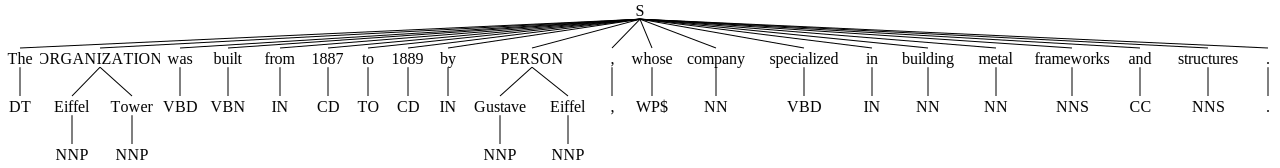

In [48]:
nltk.ne_chunk(tag_element)

In [49]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 14.9 MB/s eta 0:00:02
   - -------------------------------------- 0.6/24.0 MB 7.7 MB/s eta 0:00:04
   - -------------------------------------- 0.8/24.0 MB 6.1 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.2/24.0 MB 5.2 MB/s eta 0:00:05
   -- ------------------------------------- 1.3/24.0 MB 4.9 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/24.0 MB 4.8 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/24.0 MB 4.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.8/24.0 MB 4.4 MB/s eta 0:00:06
   --- ------------------------------------ 2.0/24.0 MB 4.3 MB/s eta 0:00:06
   --- ------------------------------------ 2.1/24.0 MB 4.2 MB/s eta 0:00:06
   --- ------------------------------------ 2.2/24.0 MB 4.2 MB/s eta 0:00:06
   --

In [50]:
import gensim
from gensim.models import word2vec, keyedvectors

In [51]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

vec_king = wv["king"]

[=========-----------------------------------------] 19.5% 324.3/1662.8MB downloaded